In [ ]:
# import all libaries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme( style="darkgrid", font_scale=2 )
df = pd.read_csv("./heart.csv")

# what is heart disease, cardiovascular disease, this are heart conditions that includes, coronary heart disease, hypertension, cardiac arrest, etc....

# .describe the data
# df.describe()
df.dropna( inplace=True )
df.drop_duplicates( inplace=True )
df

In [ ]:
# plot data in graphs
df1 = df.copy()
df1.loc[ df1["HeartDisease"] == 1, "HeartDisease" ] = "Has heart disease"
df1.loc[ df1['HeartDisease'] == 0, "HeartDisease" ] = "No heart disease"
g = sns.catplot( data=df1, x="Sex", kind="count", hue="HeartDisease", height=7, aspect=1.3 )
g.set_axis_labels( x_var="Gender", y_var="Counter" ) # change axis labels
g.set_xticklabels(labels=["Male", "Female"]) # change bar names.
g.fig.suptitle('COMPARING HEART DISEASE BY GENDER') # set graph title
g.fig.subplots_adjust(top=.9) # set margin

In [ ]:
# show heart disease by age and gender
a = sns.catplot( data=df1, x="Sex", y="Age", hue="HeartDisease", kind="swarm", aspect=1.5, height=7 )
a.set_axis_labels( x_var="Gender", y_var="Age" ) # tick labels
a.set_xticklabels( labels=["Male", "Female"] )
a.fig.suptitle("COMPARING AGE WITH HEART DISEASE BY GENDER")
a.fig.subplots_adjust( top=.9)

In [ ]:
# let compare exerxise angina with age and heart details....
# angina: this is a chest pain caused by reduced blood flow to the heart muscless.... 
# angina is a sign that you could be at a risk of heart failure/attack
df1.loc[ df1['Sex'] == "F", "Sex" ] = "Female"
df1.loc[ df1['Sex'] == "M", "Sex" ] = "Male"
b = sns.catplot( data=df1, x="ExerciseAngina", kind="count", hue="Sex", col="HeartDisease", aspect=1, height=8)
b.set_axis_labels( x_var="Angina", y_var="Number" )
b.set_xticklabels( labels=["No Angina", "Has Angina"] )
b.fig.suptitle("COMPARING ANGINA BY GENDER AND HEART DISEASE")
b.fig.subplots_adjust(top=.8)

In [ ]:
# comparing angina by gender with yhue of heart disease
df1.loc[ df1['ExerciseAngina'] == "Y", "ExerciseAngina" ] = "Has Angina"
df1.loc[ df1['ExerciseAngina'] == "N", "ExerciseAngina" ] = "No Angina"
c = sns.catplot(data=df1, y="Age", x="Sex", hue="ExerciseAngina", col="HeartDisease", kind="swarm", aspect=1, height=8)
c.set_axis_labels(x_var="Gender", y_var="Number")
c.fig.suptitle("COMPARING ANGINA BY GENDER AND HEART DISEASE")
c.fig.subplots_adjust(top=.8)

In [ ]:
# comparing chest pain types with age
df1.loc[ df["ChestPainType"] == "TA", "ChestPainType" ] = "Typical Angina"
df1.loc[ df["ChestPainType"] == "ATA", "ChestPainType" ] = "Atypical Angina" 
df1.loc[ df["ChestPainType"] == "NAP", "ChestPainType" ] = "Non-Angina Pain"
df1.loc[ df["ChestPainType"] == "ASY", "ChestPainType" ] = "Asymptomatic" 
d = sns.catplot( data=df1, x="Sex", hue="ChestPainType", kind="count", aspect=.8, height=9, col="HeartDisease", hue_order=["Typical Angina", 'Atypical Angina', 'Non-Angina Pain', 'Asymptomatic'] )
d.set_axis_labels( x_var="Gender", y_var="Number" )
d.fig.suptitle("COMPARING CHEST PAIN BY GENDER, WITH HEART DISEASE")
d.fig.subplots_adjust(top=.8)

/home/kiks/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


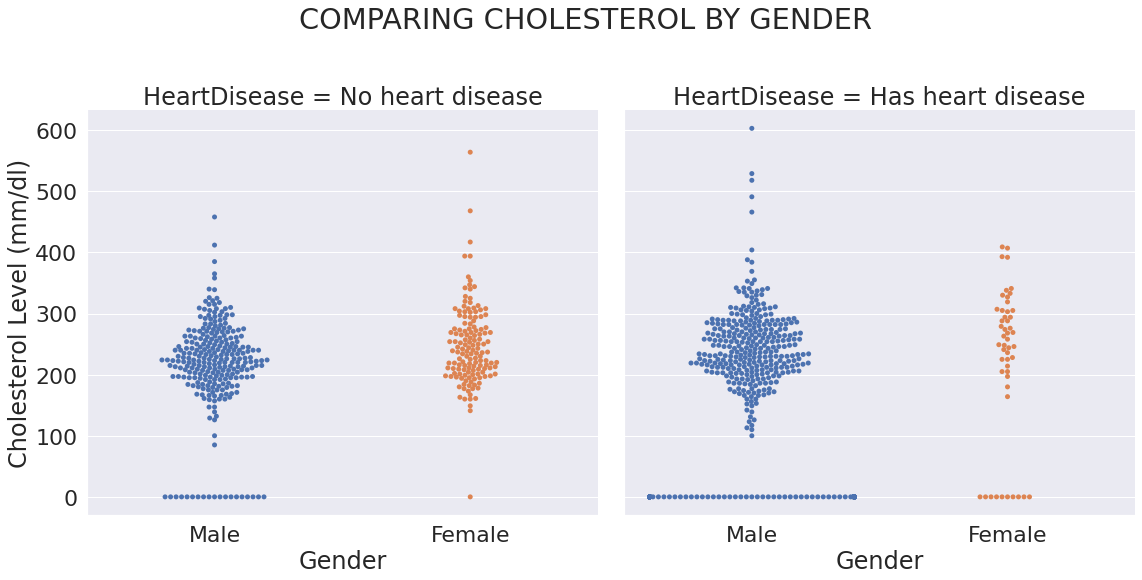

In [462]:
# check cholesterol level by gender
e = sns.catplot( data=df1, y="Cholesterol", x="Sex", height=8, kind="swarm", col="HeartDisease" )
e.set_axis_labels( x_var="Gender", y_var="Cholesterol Level (mm/dl)" )
e.fig.suptitle("COMPARING CHOLESTEROL BY GENDER")
e.fig.subplots_adjust( top=.8 )

In [ ]:
# compare max heart rate of people by gender and heart disease
f = sns.catplot( data=df1, y="MaxHR", x="Sex", height=10, col="HeartDisease", kind="boxen" )
f.set_axis_labels( y_var="Maximun Heart Rate" )
f.fig.suptitle("COMPARING MAX HEART RATE ACHIEVED BY GENDER, WITH HEART DISEASE")
f.fig.subplots_adjust(top=.8)


# most female with heart disease have heart rate between 120 and 160, while men have more than 160 heart rate when they have heart disease.
# both gender, seems to have high heart rate, when they dont have heart disease. so heart diseases reduces max heart rate

In [ ]:
# find information in resting bp of the users.
# import matplotlib.ticker as ticker
# h.xaxis.set_major_locator(ticker.MultipleLocator(5))
# h.xaxis.set_major_formatter(ticker.ScalarFormatter())

h = sns.catplot( data=df1, x="Sex", y="RestingBP", hue="Sex", col="HeartDisease", kind="boxen", height=10)
h.set_axis_labels( x_var="Gender", y_var="Resting Blood Pressure (mm/hg)" )
h.fig.suptitle("COMPARING BY GENDER BLOOD PRESSURE. HEART DISEASE")
h.fig.subplots_adjust(top=.8)


# normal bp is from 90/60mm/hg and 120/80mm/hg
# high blood pressure is from 140/90mm/hg or hight
# low blood pressure is from 90/60mm/hg
# from this graph female have high blood pressure when with heart disease than men
# 1st graph, having high/low blood pressure does not mean heart disease

In [ ]:
# comparing st/hr slope in patients
i = sns.catplot(data=df1, x="ST_Slope", y="MaxHR", hue="HeartDisease", kind="bar", col="Sex", height=10 )
i.set_axis_labels( x_var="Heart Rate Slope", y_var="maximun heart rate" )
i.fig.suptitle("COMPARE ST SLOPE BY GENDER AND HEART DISEASE")
i.fig.subplots_adjust(top=.8)


# st/heart rate slope, is amoung the best method to diagnose heart diseases.
# both gender have a high heart rate, with no heart disease.
# seems like heart disease reduces the maximun heart rate.

In [ ]:
# comparing st/hr slope in patients
i = sns.catplot(data=df1, x="ST_Slope", y="Age", hue="HeartDisease", kind="box", col="Sex", height=10 )
i.set_axis_labels( x_var="Heart Rate Slope", y_var="Age" )
i.fig.suptitle("COMPARE ST SLOPE BY GENDER AND HEART DISEASE")
i.fig.subplots_adjust(top=.8)


# st/heart rate slope, is amoung the best method to diagnose heart diseases.
# from data & above graph, heart rate slope has high age with each heart rate slope type.
# when heart rate slope is up for females, most of them are on the 50-60 age. there are not a lot of females with heart disease and have a down heart rate slope.